<a href="https://colab.research.google.com/github/santhimaddipudi/Azure-Databricks-project-on-Yelp-Dataset/blob/main/Data_analysis_with_Numpy_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Loading images into memory maps**
##1. First we need to initialize the following arrays:

 An array that holds the image data

 An array with random coordinates of the centers of the squares

 An array with random radii (plural of radius) of the squares

 An array with random colors of the squares

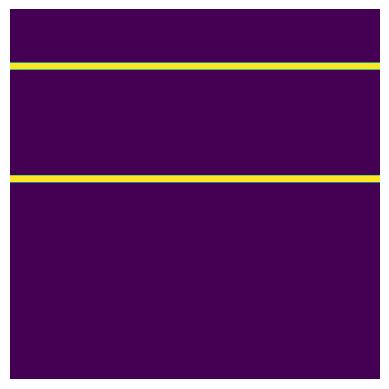

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 512
NSQUARES = 30
# Initialize
img = np.zeros((N, N), np.uint8)
centers = np.random.randint(0, N, size=(NSQUARES, 2))
radii = np.random.randint(0, N/12, size=NSQUARES)
colors = np.random.randint(100, 255, size=NSQUARES)
# Generate squares
for i in range(NSQUARES):
  xindices = range(centers[i][0] - radii[i], centers[i][0] + radii[i])
  xindices = np.clip(xindices,0, N - 1)
  yindices = range(centers[i][1] - radii[i], centers[i][1] + radii[i])
  yindices = np.clip(yindices,0, N - 1)
  if len(xindices) == 0 or len(yindices) == 0:
     continue
coordinates = np.meshgrid(xindices, yindices)
img[coordinates] = colors[i]
# Load into memory map
img.tofile('random_squares.raw')
img_memmap = np.memmap('random_squares.raw', shape=img.shape)
# Display image
plt.imshow(img_memmap)
plt.axis('off')
plt.show()

In [ ]:
from numpy.lib.function_base import meshgrid
a=np.random.randint(0, 20, size=10)
print(a)
b=np.clip(a,1,4)
print(b)
np.meshgrid(a,b)

In [93]:
#at() - This method allows fancy indexing in-place.
np.random.seed(44)
a = np.random.randint(1,10,10)
print(a)
np.sign.at(a,[1,6])
print(a)

[5 4 2 4 1 5 4 9 8 8]
[5 1 2 4 1 5 1 9 8 8]


In [97]:
#Partial sorting via selection for fast median with the partition() function
np.random.seed(20)
a = np.random.randint(0, 7, 9)
print(a)
print(np.partition(a,4))

[3 2 4 2 1 4 3 6 2]
[2 1 2 2 3 3 4 6 4]


In [105]:
#create 3X3 matrix with element 7
print(np.full((3, 3), 7))
#The full_like() function checks the metadata of an array and reuses it for the new array.
a = np.linspace(0, 1, 5)
print(a)

print(np.full_like(a, 3,dtype=int))


[[7 7 7]
 [7 7 7]
 [7 7 7]]
[0.   0.25 0.5  0.75 1.  ]
[3 3 3 3 3]


In [ ]:
#Random sampling with numpy choice()
N = 100
np.random.seed(28)
#Generate a data sample following the binomial distribution that simulates lipping a fair coin five times
data = np.random.binomial(5, .5, size=N)
#Generate 30 samples and compute their means (more samples will give abetter result):
bootstrapped = np.random.choice(data, size=(N,30))
means = bootstrapped.mean(axis=0)
print(means)
#Visualize the arithmetic means distribution with a matplotlib box plot
plt.title('Bootstrapping demo')
plt.grid()
plt.boxplot(means)
plt.plot(3* [data.mean()], lw=3, label='Original mean')
plt.legend(loc='best')
plt.show()